In [1]:
import gym 
import random 
import numpy as np
import tensorflow as tf

env = gym.make('MountainCar-v0')

In [2]:
scores = [] 
accepted_score = [] 
required_score = -198 

training_data =[] 

for i in range(10000): 
    if i % 100 == 0:
        print(i) 

    score = 0 
    env.reset() 

    # 입출력 데이터 저장 (모든 게임) 
    game_memory = []
    # 이전 상태 저장
    previous_obs = [] 

    while True: 
        action = env.action_space.sample()
        obs, reward, done, _ = env.step(action) 

        # env.render()

        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])

        previous_obs = obs

        if obs[0] > -0.2:
            reward = 1

        score += reward
        # step += 1

        if done:
            break 

    scores.append(score)

    if score > required_score:
        accepted_score.append(score) 

        for data in game_memory:
            training_data.append(data) 

# env.env.close()

scores = np.array(scores)
print(f"score mean : {scores.mean()}")
print(f"accepted_score : {accepted_score}")



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
score mean : -199.936
accepted_score : [-188.0, -176.0, -188.0, -192.0, -192.0, -194.0, -192.0, -188.0, -182.0, -178.0, -196.0, -190.0, -174.0, -178.0, -180.0, -176.0, -188.0, -168.0, -172.0, -184.0, -172.0, -190.0, -176.0, -180.0, -190.0, -186.0, -190.0, -192.0, -190.0, -194.0, -160.0, -192.0, -186.0, -170.0, -182.0, -186.0, -168.0, -192.0, -190.0]


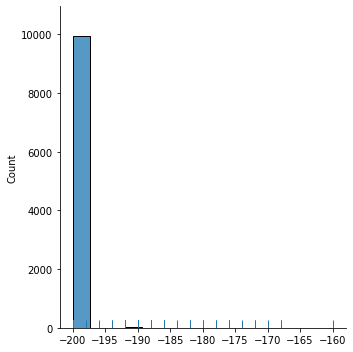

In [3]:
import seaborn as sns

sns.displot(scores, rug=True)

In [4]:
training_data[:5]

[[array([-4.000534e-01,  9.514413e-05], dtype=float32), 1],
 [array([-0.4008638 , -0.00081038], dtype=float32), 1],
 [array([-0.402574  , -0.00171023], dtype=float32), 1],
 [array([-0.4051721, -0.0025981], dtype=float32), 1],
 [array([-0.40863985, -0.00346774], dtype=float32), 1]]

In [5]:
train_x = np.array([i[0] for i in training_data])
print(f"Before shape : {train_x.shape}")
train_x = train_x.reshape(-1, 2)
print(f"After shape : {train_x.shape}")

train_y = np.array([i[1] for i in training_data])
print(f"Before shape : {train_y.shape}")
train_y = train_y.reshape(-1, 1)
print(f"After shape : {train_y.shape}")


Before shape : (7761, 2)
After shape : (7761, 2)
Before shape : (7761,)
After shape : (7761, 1)


In [6]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[2, ], activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(3, activation='relu'), 
])

model.compile(optimizer=tf.optimizers.Adam()
            , loss='sparse_categorical_crossentropy'
            , metrics=['accuracy'])




In [7]:
hist = model.fit(train_x, train_y, epochs=30, batch_size=16, validation_split=0.25)

Epoch 1/30
364/364 [==============================] - 2s 3ms/step - loss: 1.1006 - accuracy: 0.3514 - val_loss: 1.0998 - val_accuracy: 0.3514
Epoch 2/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0971 - accuracy: 0.3512 - val_loss: 1.0947 - val_accuracy: 0.3766
Epoch 3/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0948 - accuracy: 0.3629 - val_loss: 1.0947 - val_accuracy: 0.3426
Epoch 4/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0939 - accuracy: 0.3698 - val_loss: 1.0871 - val_accuracy: 0.3926
Epoch 5/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0911 - accuracy: 0.3808 - val_loss: 1.0856 - val_accuracy: 0.3864
Epoch 6/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0894 - accuracy: 0.3871 - val_loss: 1.0841 - val_accuracy: 0.4029
Epoch 7/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0883 - accuracy: 0.3902 - val_loss: 1.0881 - val_accuracy: 0.3694
Epoch 

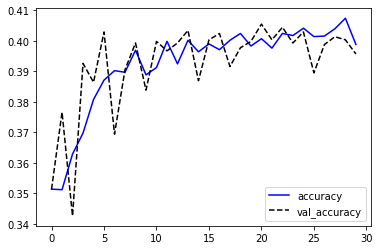

In [8]:
import matplotlib.pyplot as plt 

plt.plot(hist.history['accuracy'], 'b-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'k--', label='val_accuracy')
plt.legend() 
plt.show()

In [39]:

# env = wrap_env(gym.make('MountainCar-v0')) 
# env = gym.make('MountainCar-v0')
env.reset() 

score = 0 
step = 0 
previous_obs = [] 

while True: 

    # print(1)

    env.render()

    if len(previous_obs) == 0:
        action = env.action_space.sample() 
    else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
        
    obs, reward, done, _ = env.step(action) 
    previous_obs = obs
    score += reward 
    step += 1

    if done:
        break 


print(f"score : {score}")
print(f"step : {step}")

env.env.close() 


score : -9.05007963605572
step : 999


In [10]:
env.env.close()

In [11]:
env = gym.make('MountainCarContinuous-v0')

In [12]:
print(env.observation_space)

print()

print(env.observation_space.low)
print(env.observation_space.high)

print()


print(f"action space : {env.action_space}") 

print(env._max_episode_steps)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

[-1.2  -0.07]
[0.6  0.07]

action space : Box([-1.], [1.], (1,), float32)
999


In [13]:
step = 0 
score = 0 
env.reset() 

frames = [] 

while True: 

    env.render() 

    action = env.action_space.sample() 
    obs, reward, done, _ = env.step(action) 

    print(f"obs : {obs}")
    print(f"score : {score}")

    score += reward
    step += 1

    if done:
        break 

env.env.close() 


obs : [-0.42928532 -0.00083404]
score : 0
obs : [-4.2964426e-01 -3.5892928e-04]
score : -0.0007521336167988446
obs : [-0.43107906 -0.00143481]
score : -0.06191132116265357
obs : [-0.43333977 -0.00226073]
score : -0.06834643149644067
obs : [-0.4359996  -0.00265982]
score : -0.06922874283349424
obs : [-0.44026858 -0.00426896]
score : -0.07245926895419717
obs : [-0.44562367 -0.0053551 ]
score : -0.11339194319093128
obs : [-0.45150363 -0.00587996]
score : -0.12311204430485545
obs : [-0.45794028 -0.00643665]
score : -0.12324470335776166
obs : [-0.46392277 -0.00598247]
score : -0.1232628003737605
obs : [-0.46901134 -0.00508855]
score : -0.16282160029816906
obs : [-0.47338632 -0.00437499]
score : -0.24251938131325723
obs : [-0.4778234  -0.00443709]
score : -0.29838451012906786
obs : [-0.48191562 -0.00409221]
score : -0.3027406899811599
obs : [-0.48498517 -0.00306955]
score : -0.32372397572872025
obs : [-0.48740178 -0.00241661]
score : -0.402871113011415
obs : [-0.49094722 -0.00354542]
score :

In [38]:

state_grid_count = 10 
action_grid_count = 6 

q_table = []

for i in range(state_grid_count):

    q_table.append([])

    for j in range(state_grid_count):
        q_table[i].append([])

        for a in range(action_grid_count):
            q_table[i][j].append(1e-4) 

actions = range(action_grid_count)
actions = np.array(actions).astype(float) 
actions *= ((env.action_space.high - env.action_space.low) / (action_grid_count - 1))
actions += env.action_space.low

print(actions)

[-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]


In [29]:
import random 

# 관찰 상태를 각 격자에 보관
def obs_to_state(env, obs): 
    obs = obs.flatten() 
    # print(f"obs : {obs}")
    low = env.observation_space.low 
    # print(f"high : {high}")
    # print(f"low : {low}")
    high = env.observation_space.high
    idx = (obs - low) / (high - low) * state_grid_count
    # print(f"idx : {idx}")
    idx = [int(x) for x in idx]
    # print(f"idx : {idx}")

    return idx 

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    sum_exp_logits = np.sum(exp_logits)
    return exp_logits / sum_exp_logits

In [25]:
sample = env.observation_space.sample() 
grid = obs_to_state(env, sample) 

print(sample) 
print(grid) 

obs : [-0.6585494   0.05737864]
low : [-1.2  -0.07]
high : [0.6  0.07]
idx : [3.008059  9.0984745]
idx : [3, 9]
[-0.6585494   0.05737864]
[3, 9]


In [52]:
# actions
type(env.action_space.sample())

numpy.ndarray

In [57]:
max_episodes = 10000 

scores = [] 
steps = [] 
select_actions = [] 

learning_rate = 0.05 
gamma = 0.99
epsilon = 1.0 
epsilon_min = 0.01 

for i in range(max_episodes):
    epsilon *= 0.9 
    # 입실론 값보다 난수가 작을 때 랜덤한 값, 아니면 입실론 
    epsilon = max(epsilon_min, epsilon)

    # print(i) 

    if i % 100 == 0 and i != 0: 
        print(i, 'mean_score : {}, mean_step : {}, epsilon : {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:]), epsilon))

    previous_obs = env.reset() 
    score = 0 
    step = 0 

    while True: 
        state_idx = obs_to_state(env, previous_obs) 

        if random.random() < epsilon:
            # print(1) 
            action_idx = random.randint(0, action_grid_count-1)
            # print(action_idx)
            action = actions[action_idx]

        else:
            # print(2)
            logits = q_table[state_idx[0]][state_idx[1]]
            action_idx = np.argmax(softmax(logits))
            action = actions[action_idx]

        print("action : {}, type: {}".format(action, action.dtype))
        # action = 3.1
        # action = action.astype(float)
        # action = np.asscalar(action)
        # action = int(action)

        obs, reward, done, _ = env.step(action) 
        previous_obs = obs
        score += reward 
        reward -= 0.05 
        step += 1

        select_actions.append(action) 
        new_state_idx = obs_to_state(env, obs) 

        q_table[state_idx[0]][state_idx[1]][action_idx] = learning_rate * \
            (reward + gamma * np.amax(q_table[new_state_idx[0]][new_state_idx[1]]) - q_table[state_idx[0]][state_idx[1]][action_idx])

        if done:
            break 


    scores.append(score)
    steps.append(step) 

    if np.mean(scores[-100:]) >= 90:
        print('Solved on epsilon {}!'.format(i))
        break 

2
action : -0.19999998807907104, type: float64


IndexError: invalid index to scalar variable.